Import numpy, scipy, and matplotlib and define constants

In [1]:
import numpy as np
import scipy as scipy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
r = np.linspace(0.0000001,15,1500) #GeV-1

#constants
m1 = 1.275 #+ 0.025
m2 = 4.65 #+0.04
#GeV/c^2 Mass of the Chamarium
invmu = 1/m1 + 1/m2
mu = 1/invmu
u0 = np.array([0.,1.0]) #dots to make sure number is real
b = 0.156286#+0.01841 #dimensionless strong coupling constant optimised for the Bc Meson
a = 0.225139389 #+0.059626 #GeV^2
#https://journals-aps-org.ezphost.dur.ac.uk/rmp/pdf/10.1103/RevModPhys.80.1161
#https://arxiv.org/pdf/1902.00571.pdf

Model with float energy

In [2]:
def model_E(u,r,l,E):
    dvdr = (u[0]*l*(l+1))/(r**2) - 2*mu*u[0]*(E + ((4*a)/(3*r)) - b*r)
    return (u[1],dvdr)

Code to Normalise the Wavefunction

In [3]:
def normalize_psi(psi, r):
    int_psi_square = scipy.integrate.simps((psi) ** 2, r)
    return psi/np.sqrt(int_psi_square)

def square_psi(psi):
    return (np.array(psi))**2

Code to find turning points and nodes

In [4]:
def turning_points(x):
    number_tps = 0
    for i in range(1, len(x)-1):
        if ((x[i-1] < x[i] and x[i+1] < x[i]) or (x[i-1] > x[i] and x[i+1] > x[i])):
            number_tps += 1
    return number_tps

def nodes(x):
    number_ns = 0
    for i in range(0, len(x)-1):
        if x[i]*x[i+1]<0:
            number_ns += 1
    return number_ns

Iteration code to find the energy of a given, l state and and a known energy range. ENERGY RANGE MUST BE FAIRLY CLOSE TO CORRECT ENERGY.

In [5]:
def energy_iterate(l,E1,E3):
    #plt.xlabel("Distance from Nucleus ($MeV$)")
    #plt.ylabel("Radial Probability Density, $|u_n,l|^2$")
    #plt.legend(loc = "upper right")
    for i in range(10):
        E2 = 0.5*(E1 + E3)
        a = odeint(model_E,u0,r, args = (l,E1))[:,0]
        b = odeint(model_E,u0,r, args = (l,E2))[:,0]
        c = odeint(model_E,u0,r, args = (l,E3))[:,0]  
        if turning_points(a) != turning_points(b) and nodes(a) != nodes(b):
            E3 = E2
        elif turning_points(b) != turning_points(c) and nodes(b) != nodes(c):
            E1 = E2
    return E2#, plt.plot(r,square_psi(normalize_psi(b,r)), color = 'red')

In [6]:
def energy_iterate_graph(l,E1,E3):
    plt.xlabel("Distance from Nucleus ($MeV$)")
    plt.ylabel("Radial Probability Density, $|u_n,l|^2$")
    plt.legend(loc = "upper right")
    for i in range(100):
        E2 = 0.5*(E1 + E3)
        a = odeint(model_E,u0,r, args = (l,E1))[:,0]
        b = odeint(model_E,u0,r, args = (l,E2))[:,0]
        c = odeint(model_E,u0,r, args = (l,E3))[:,0]  
        if turning_points(a) != turning_points(b) and nodes(a) != nodes(b):
            E3 = E2
        elif turning_points(b) != turning_points(c) and nodes(b) != nodes(c):
            E1 = E2
    return b
#plt.plot(r,square_psi(normalize_psi(b,r)), color = 'red')
#plt.xlabel("Distance from Nucleus ($MeV$)")
#plt.ylabel("Radial Probability Density, $|u_n,l|^2$")
#plt.legend(loc = "upper right")


Now define Search Code - finds multiple energy convergences assuming multiple energy levels are available

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


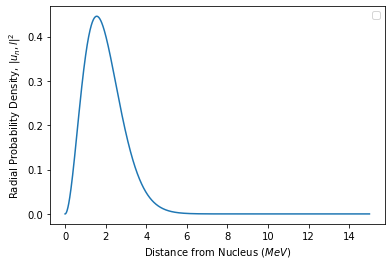

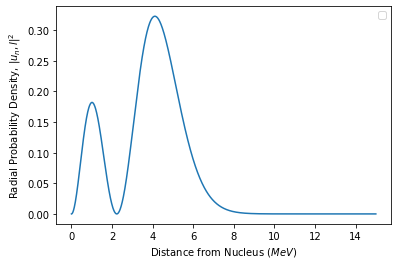

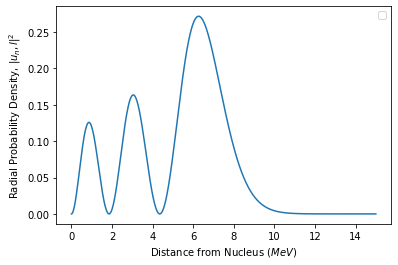

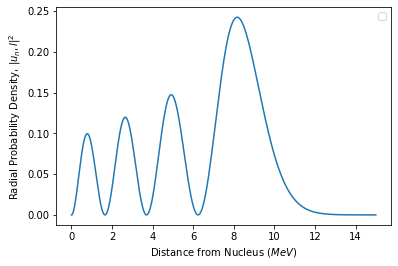

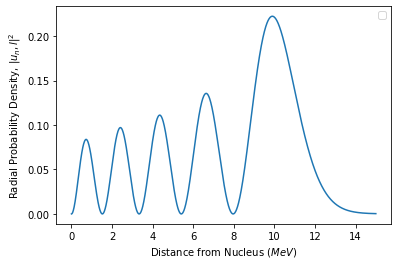

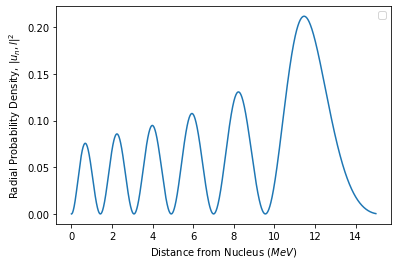

[6274.51, 6742.09, 7096.97, 7402.83, 7678.91, 7937.5]

In [7]:
def search_l(l):
    x = []
    for i in range(1,23,1):
        y = energy_iterate(l,i/10,(i+1)/10)
        z = round(y,12)
        if (z*1000) != round(z*1000): #excluding the non-convergent solutions
            w = round(((z + m1 + m2)*1000),2)
            x.append(w)           
    for c in x:
        plt.figure(x.index(c)+1)
        v = energy_iterate_graph(l,(c/1000 -m1-m2) - 0.02,(c/1000 -m1-m2) + 0.02)
        plt.plot(r,square_psi(normalize_psi(v,r)))
    plt.xlabel("Distance from Nucleus ($MeV$)")
    plt.ylabel("Radial Probability Density, $|u_n,l|^2$")
    plt.show()    
    return x    
search_l(0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


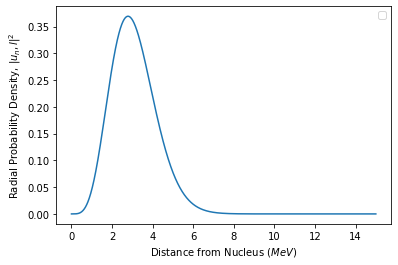

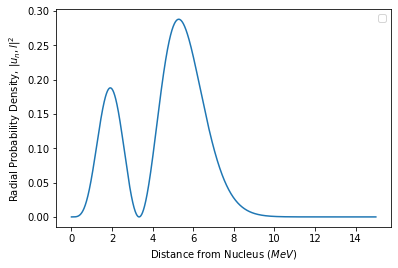

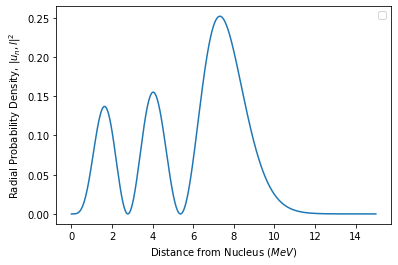

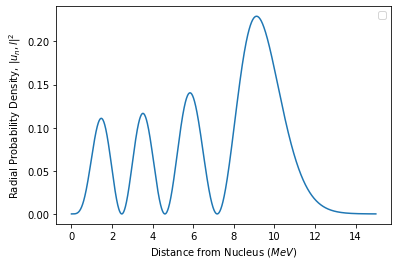

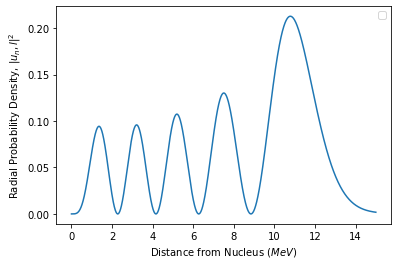

[6590.33, 6963.77, 7280.96, 7565.23, 7826.56]

In [8]:
search_l(1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


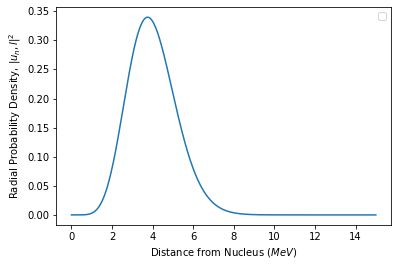

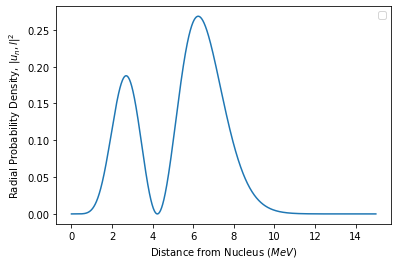

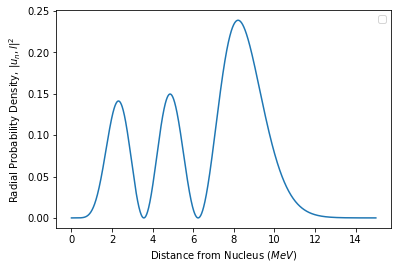

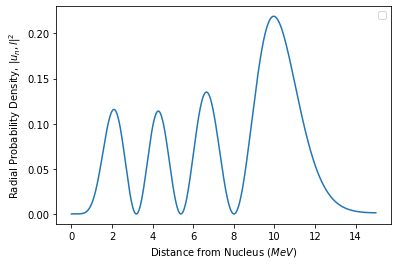

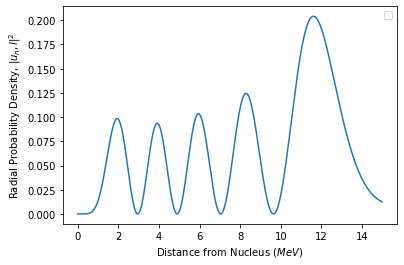

[6822.36, 7152.64, 7446.0, 7714.06, 7962.5]

In [9]:
search_l(2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


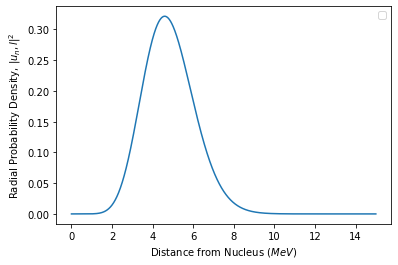

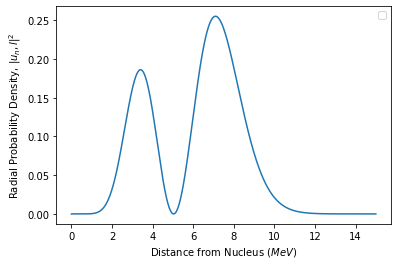

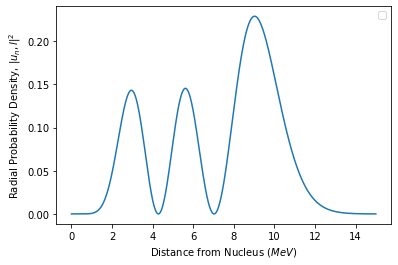

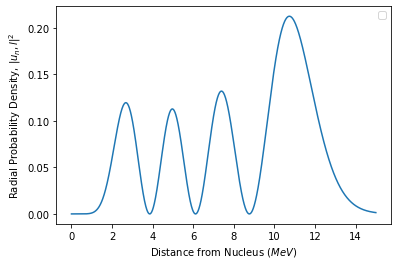

[7021.97, 7324.9, 7600.49, 7856.25]

In [10]:
search_l(3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


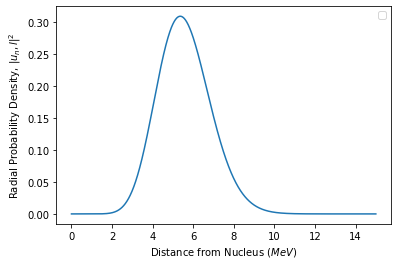

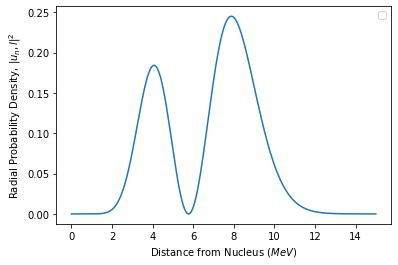

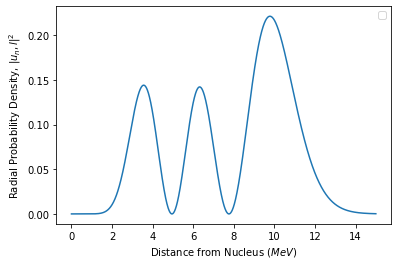

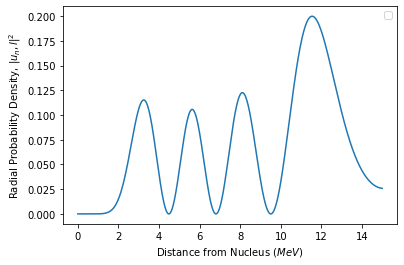

[7202.64, 7485.64, 7747.27, 7987.5]

In [11]:
search_l(4)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


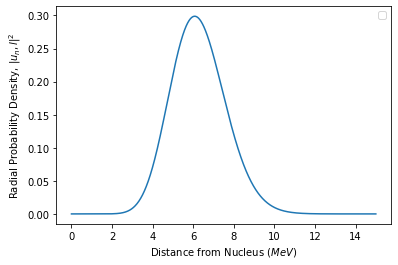

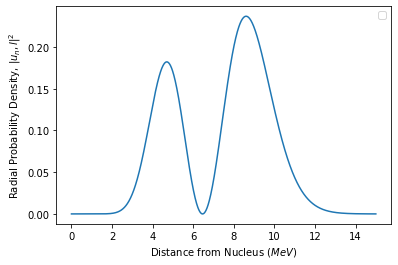

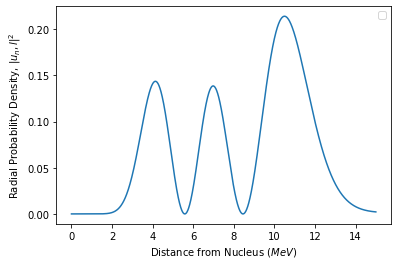

[7370.21, 7637.79, 7887.5]

In [12]:
search_l(5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


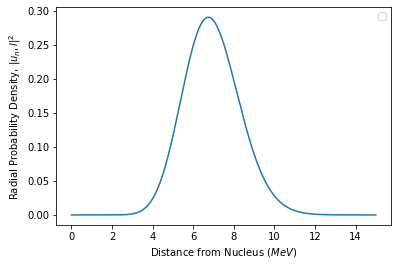

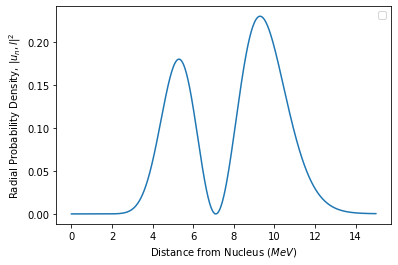

[7527.83, 7782.81]

In [13]:
search_l(6)

Now we plot all energy levels on one graph

In [ ]:
def energy_iterate_total(l,E1,E3):
    for i in range(100):
        E2 = 0.5*(E1 + E3)
        a = odeint(model_E,u0,r, args = (l,E1))[:,0]
        b = odeint(model_E,u0,r, args = (l,E2))[:,0]
        c = odeint(model_E,u0,r, args = (l,E3))[:,0]  
        if turning_points(a) != turning_points(b) and nodes(a) != nodes(b):
            E3 = E2
        elif turning_points(b) != turning_points(c) and nodes(b) != nodes(c):
            E1 = E2
    return square_psi(normalize_psi(b,r))

In [ ]:
n1l0 = energy_iterate_total(0,0.2,0.25)
n2l0 = energy_iterate_total(0,0.8,0.9)
#n2l1 = energy_iterate_total(1,-9.9e-06,-1.0e-6)
plt.plot(r,n1l0, label = 'n = 1, l = 0', color = "green")
plt.plot(r,n2l0, label = 'n = 2, l = 0', color = 'blue')
#plt.plot(r,n2l1, label = 'n = 2, l = 1', color = "red")
plt.xlabel("Distance from Nucleus ($MeV$)")
plt.ylabel("Radial Probability Density, $|u_n,l|^2$")
plt.legend(loc = "upper right")
plt.savefig('Radial_Probability_Density of the all states.png', dpi=600, bbox_inches='tight')

In [ ]:
b = odeint(model_E,u0,r, args = (0,6.74209))[:,0]
print(b)